<a href="https://colab.research.google.com/github/cwb4-dev/back-of-the-envelope/blob/main/10_minutes_to_pandas_in_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the <a href="https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook" target="_blank">Cookbook<a/>.

Customarily, we import as follows:

In [ ]:
import numpy as np
import pandas as pd

## Object Creation


See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro">Intro to data structures section</a>.

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> by passing a list of values, letting pandas create a default integer index:

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a NumPy array, with a datetime index using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range">`date_range()`</a> and labeled columns:

In [ ]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.524103,0.913936,-0.648058,2.680350
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350
2013-01-04,-0.051502,-1.190048,0.502404,0.515585
2013-01-05,0.503904,-1.634828,0.749093,-0.481287
2013-01-06,-0.300019,-0.068817,-1.336835,0.070851


Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a dictionary of objects that can be converted into a series-like structure:

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> have different <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">`dtypes`</a>:

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using an interactive tool with automatic completion for column names, here’s a subset of the attributes that will be completed:
```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated
```
As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.



## Viewing data

See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics">Basics section</a>.

Use <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head">`DataFrame.head()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail">`DataFrame.tail()`</a> to view the top and bottom rows of the frame respectively:

In [ ]:
df.head()

,A,B,C,D
2013-01-01,-0.524103,0.913936,-0.648058,2.680350
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350
2013-01-04,-0.051502,-1.190048,0.502404,0.515585
2013-01-05,0.503904,-1.634828,0.749093,-0.481287


In [ ]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.051502,-1.190048,0.502404,0.515585
2013-01-05,0.503904,-1.634828,0.749093,-0.481287
2013-01-06,-0.300019,-0.068817,-1.336835,0.070851


Display the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index">`DataFrame.index`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns">`DataFrame.columns`</a>:

In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a>, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> of all floating-point values, and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is fast and doesn’t require copying data:

In [ ]:
df.to_numpy()

array([[-0.52410284,  0.91393585, -0.64805804,  2.68035011],
       [-1.35400797, -1.75001349, -0.00980681,  0.87253736],
       [ 0.97794425, -0.44954492, -0.54534324, -1.07534963],
       [-0.05150191, -1.19004796,  0.50240362,  0.51558494],
       [ 0.50390391, -1.63482808,  0.74909289, -0.481287  ],
       [-0.3000188 , -0.06881716, -1.33683529,  0.07085129]])

For `df2`, the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> with multiple dtypes, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is relatively expensive:



In [ ]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

NOTE: <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> does not include the index or column labels in the output.

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe">`describe()`</a> shows a quick statistic summary of your data:

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.124631,-0.696553,-0.214758,0.430448
std,0.814590,1.027854,0.779927,1.303284
min,-1.354008,-1.750013,-1.336835,-1.075350
25%,-0.468082,-1.523633,-0.622379,-0.343252
50%,-0.175760,-0.819796,-0.277575,0.293218
75%,0.365052,-0.163999,0.374351,0.783299
max,0.977944,0.913936,0.749093,2.680350


Transposing your data:

In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.524103,-1.354008,0.977944,-0.051502,0.503904,-0.300019
B,0.913936,-1.750013,-0.449545,-1.190048,-1.634828,-0.068817
C,-0.648058,-0.009807,-0.545343,0.502404,0.749093,-1.336835
D,2.680350,0.872537,-1.075350,0.515585,-0.481287,0.070851


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index">`DataFrame.sort_index()`</a> sorts by an axis:

In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,2.680350,-0.648058,0.913936,-0.524103
2013-01-02,0.872537,-0.009807,-1.750013,-1.354008
2013-01-03,-1.075350,-0.545343,-0.449545,0.977944
2013-01-04,0.515585,0.502404,-1.190048,-0.051502
2013-01-05,-0.481287,0.749093,-1.634828,0.503904
2013-01-06,0.070851,-1.336835,-0.068817,-0.300019


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values">`DataFrame.sort_values()`</a> sorts by values:

In [ ]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537
2013-01-05,0.503904,-1.634828,0.749093,-0.481287
2013-01-04,-0.051502,-1.190048,0.502404,0.515585
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350
2013-01-06,-0.300019,-0.068817,-1.336835,0.070851
2013-01-01,-0.524103,0.913936,-0.648058,2.680350


## Selection

NOTE: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat">`DataFrame.iat()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a>.

See the indexing documentation <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">Indexing and Selecting Data</a> and <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/advanced.html#advanced">MultiIndex / Advanced Indexing</a>.



### Getting

Selecting a single column, which yields a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a>, equivalent to `df.A`:

In [ ]:
df["A"]

2013-01-01   -0.524103
2013-01-02   -1.354008
2013-01-03    0.977944
2013-01-04   -0.051502
2013-01-05    0.503904
2013-01-06   -0.300019
Freq: D, Name: A, dtype: float64

Selecting via `[]` (`__getitem__`), which slices the rows:

In [ ]:
df[0:3]

,A,B,C,D
2013-01-01,-0.524103,0.913936,-0.648058,2.680350
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350


In [ ]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350
2013-01-04,-0.051502,-1.190048,0.502404,0.515585


### Selection by label

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label">Selection by Label</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

For getting a cross section using a label:

In [ ]:
df.loc[dates[0]]

A   -0.524103
B    0.913936
C   -0.648058
D    2.680350
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [ ]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.524103,0.913936
2013-01-02,-1.354008,-1.750013
2013-01-03,0.977944,-0.449545
2013-01-04,-0.051502,-1.190048
2013-01-05,0.503904,-1.634828
2013-01-06,-0.300019,-0.068817


Showing label slicing, both endpoints are included:

In [ ]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-1.354008,-1.750013
2013-01-03,0.977944,-0.449545
2013-01-04,-0.051502,-1.190048


Reduction in the dimensions of the returned object:

In [ ]:
df.loc["20130102", ["A", "B"]]

A   -1.354008
B   -1.750013
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [ ]:
df.loc[dates[0], "A"]

-0.5241028394428331

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.at[dates[0], "A"]

-0.5241028394428331

### Selection by position

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer">Selection by Position</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

Select via the position of the passed integers:

In [ ]:
df.iloc[3]

A   -0.051502
B   -1.190048
C    0.502404
D    0.515585
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.051502,-1.190048
2013-01-05,0.503904,-1.634828


By lists of integer position locations, similar to the NumPy/Python style:

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.354008,-0.009807
2013-01-03,0.977944,-0.545343
2013-01-05,0.503904,0.749093


For slicing rows explicitly:

In [ ]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350


For slicing columns explicitly:

In [ ]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.913936,-0.648058
2013-01-02,-1.750013,-0.009807
2013-01-03,-0.449545,-0.545343
2013-01-04,-1.190048,0.502404
2013-01-05,-1.634828,0.749093
2013-01-06,-0.068817,-1.336835


For getting a value explicitly:

In [ ]:
df.iloc[1, 1]

-1.7500134869430155

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.iat[1, 1]

-1.7500134869430155

### Boolean indexing

Using a single column’s values to select data:

In [ ]:
df[df["A"] > 0]

,A,B,C,D
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350
2013-01-05,0.503904,-1.634828,0.749093,-0.481287


Selecting values from a DataFrame where a boolean condition is met:

In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.913936,NaN,2.680350
2013-01-02,NaN,NaN,NaN,0.872537
2013-01-03,0.977944,NaN,NaN,NaN
2013-01-04,NaN,NaN,0.502404,0.515585
2013-01-05,0.503904,NaN,0.749093,NaN
2013-01-06,NaN,NaN,NaN,0.070851


Using the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin">`isin()`</a> method for filtering:

In [ ]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.524103,0.913936,-0.648058,2.680350,one
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537,one
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350,two
2013-01-04,-0.051502,-1.190048,0.502404,0.515585,three
2013-01-05,0.503904,-1.634828,0.749093,-0.481287,four
2013-01-06,-0.300019,-0.068817,-1.336835,0.070851,three


In [ ]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350,two
2013-01-05,0.503904,-1.634828,0.749093,-0.481287,four


### Setting

Setting a new column automatically aligns the data by the indexes:

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df["F"] = s1

Setting values by label:

In [ ]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [ ]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [ ]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.648058,2.680350
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350
2013-01-04,-0.051502,-1.190048,0.502404,0.515585
2013-01-05,0.503904,-1.634828,0.749093,-0.481287
2013-01-06,-0.300019,-0.068817,-1.336835,0.070851


A `where` operation with setting:

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.648058,-2.680350
2013-01-02,-1.354008,-1.750013,-0.009807,-0.872537
2013-01-03,-0.977944,-0.449545,-0.545343,-1.075350
2013-01-04,-0.051502,-1.190048,-0.502404,-0.515585
2013-01-05,-0.503904,-1.634828,-0.749093,-0.481287
2013-01-06,-0.300019,-0.068817,-1.336835,-0.070851


## Missing data

pandas primarily uses the `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data) section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [ ]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.648058,2.680350,1.0
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537,1.0
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350,NaN
2013-01-04,-0.051502,-1.190048,0.502404,0.515585,NaN


[`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) drops any rows that have missing data:



In [ ]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.648058,2.680350,1.0
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537,1.0


[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) fills missing data:

In [ ]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.648058,2.680350,1.0
2013-01-02,-1.354008,-1.750013,-0.009807,0.872537,1.0
2013-01-03,0.977944,-0.449545,-0.545343,-1.075350,5.0
2013-01-04,-0.051502,-1.190048,0.502404,0.515585,5.0


[`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna) gets the boolean mask where values are `nan`:

In [ ]:
pd.isna(df)

,A,B,C,D
2013-01-01,False,False,False,False
2013-01-02,False,False,False,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
2013-01-06,False,False,False,False


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:


In [ ]:
df.mean()

A   -0.037280
B   -0.848875
C   -0.214758
D    0.430448
dtype: float64

Same operation on the other axis:

In [ ]:
df.mean(1)

2013-01-01    0.508073
2013-01-02   -0.560323
2013-01-03   -0.273073
2013-01-04   -0.055890
2013-01-05   -0.215780
2013-01-06   -0.408705
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically
broadcasts along the specified dimension

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.022056,-1.449545,-1.545343,-2.075350
2013-01-04,-3.051502,-4.190048,-2.497596,-2.484415
2013-01-05,-4.496096,-6.634828,-4.250907,-5.481287
2013-01-06,NaN,NaN,NaN,NaN


### Apply

[`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) applies a user defined function to the data:

In [ ]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.648058,2.680350
2013-01-02,-1.354008,-1.750013,-0.657865,3.552887
2013-01-03,-0.376064,-2.199558,-1.203208,2.477538
2013-01-04,-0.427566,-3.389606,-0.700804,2.993123
2013-01-05,0.076338,-5.024434,0.048288,2.511836
2013-01-06,-0.223681,-5.093252,-1.288547,2.582687


In [ ]:
df.apply(lambda x: x.max() - x.min())

### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

In [ ]:
s.value_counts()

### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [ ]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together along an axis with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.969243,-0.085699,1.123780,0.031939
1,1.497772,0.719339,-0.487569,-0.364224
2,-2.156861,0.642053,0.314071,-0.031905
3,-0.809775,0.101392,-1.243223,1.834187
4,-0.284252,0.111199,0.459905,1.166347
5,-0.538575,0.460858,0.138357,-1.084389
6,2.206184,-0.374048,-0.397699,-0.412602
7,0.303301,-1.769001,-0.800805,-0.434386
8,0.036679,-0.901170,-0.446103,-1.636565
9,-0.023259,0.499429,-0.015833,-0.597605


In [ ]:
# break it onto pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,0.102795,-0.909272,1.576964,-0.830619
1,-0.060983,-0.190275,-0.061194,-1.224478
2,0.018114,-0.585449,-1.186918,1.190355
3,-0.132577,-1.077505,-0.444223,0.182243
4,0.385212,-1.229749,1.151778,-0.290500
5,0.274542,-1.689567,-1.202591,-1.391290
6,-0.423694,1.036054,1.143841,-1.501955
7,0.435165,-0.257491,1.393511,0.827656
8,0.435526,0.732379,0.766487,-1.109552
9,-1.471742,-1.185060,0.577455,-0.149555


NOTE: Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it.

### Join

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [ ]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Adding a column to a `DataFrame` is relatively fast. However adding a row requires a copy, and may be expensive. It is recorecommended passing a pre-build list of records to the `DataFrame` constructor instead of buildinga `DataFrame` by iteratively appending records to it.

Another example that can be given is:

In [ ]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By 'group by' we are referring to a process invloving one or more of the following steps:


*   **Splitting** the data into group base on some criteria
*   **Applying** a function to each group independently

*   **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).


In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.848117,0.290586
1,bar,one,1.763683,-0.199249
2,foo,two,-0.115365,-0.528739
3,bar,three,0.657117,-0.188029
4,foo,two,-0.142749,-0.648729
5,bar,two,0.696670,-1.187473
6,foo,one,-0.617058,-0.621837
7,bar,three,-1.294211,-0.675882


Grouping and then applying the `sum()` funcion to the resulting group:

In [ ]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,1.823258,-2.250633
foo,-1.723289,-1.508719


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function:

In [ ]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.763683 -0.199249
    three -0.637095 -0.863911
    two    0.696670 -1.187473
foo one   -1.465175 -0.331251
    two   -0.258114 -1.177468

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [ ]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.066512 -1.932089
      two     0.738722  2.306815
baz   one     0.503809 -0.561800
      two     2.477166  1.416968

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [ ]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.066512
               B   -1.932089
       two     A    0.738722
               B    2.306815
baz    one     A    0.503809
               B   -0.561800
       two     A    2.477166
               B    1.416968
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [ ]:
stacked.unstack()

A         B
first second                    
bar   one    -0.066512 -1.932089
      two     0.738722  2.306815
baz   one     0.503809 -0.561800
      two     2.477166  1.416968

In [ ]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.066512  0.738722
      B -1.932089  2.306815
baz   A  0.503809  2.477166
      B -0.561800  1.416968

In [ ]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.066512  0.503809
       B -1.932089 -0.561800
two    A  0.738722  2.477166
       B  2.306815  1.416968

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [ ]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.608827,-0.172586
1,one,B,foo,-1.014371,0.415117
2,two,C,foo,-0.837770,-0.597578
3,three,A,bar,1.555443,-1.772584
4,one,B,bar,1.239417,0.566768
5,one,C,bar,-0.690746,-0.347901
6,two,A,foo,1.130389,-0.317614
7,three,B,foo,-0.355813,0.687121
8,one,C,foo,-1.306915,0.784907
9,one,A,bar,-0.134371,-0.687810


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.134371 -0.608827
      B  1.239417 -1.014371
      C -0.690746 -1.306915
three A  1.555443       NaN
      B       NaN -0.355813
      C  0.032900       NaN
two   A       NaN  1.130389
      B -1.430566       NaN
      C       NaN -0.837770

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [ ]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    23852
Freq: 5T, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [ ]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06    0.406571
2012-03-07    2.276888
2012-03-08    0.443980
2012-03-09   -0.598940
2012-03-10   -1.531285
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00    0.406571
2012-03-07 00:00:00+00:00    2.276888
2012-03-08 00:00:00+00:00    0.443980
2012-03-09 00:00:00+00:00   -0.598940
2012-03-10 00:00:00+00:00   -1.531285
Freq: D, dtype: float64

Converting between time span representations:

In [ ]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

2012-01   -1.318314
2012-02   -0.986512
2012-03    0.186429
2012-04   -0.298471
2012-05    0.211679
Freq: M, dtype: float64

In [ ]:
ps.to_timestamp()

2012-01-01   -1.318314
2012-02-01   -0.986512
2012-03-01    0.186429
2012-04-01   -0.298471
2012-05-01    0.211679
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [ ]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -0.647442
1990-06-01 09:00    0.654381
1990-09-01 09:00    1.104538
1990-12-01 09:00   -0.587950
1991-03-01 09:00    0.213284
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [ ]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [ ]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [ ]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [ ]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

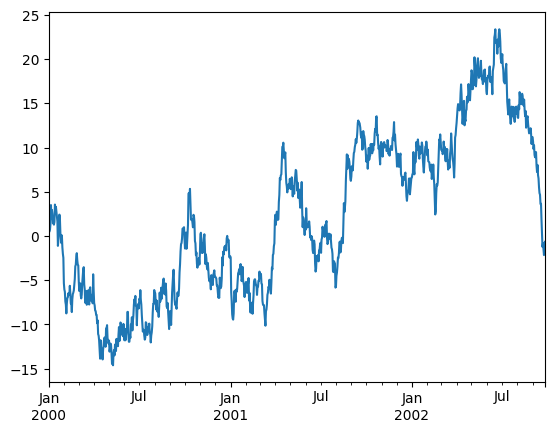

In [ ]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

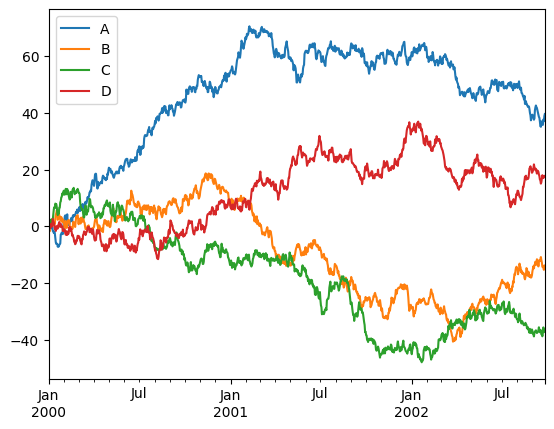

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [ ]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [ ]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.579490,-0.408378,-0.285932,-0.035712
1,2000-01-02,-0.685348,-1.771663,0.022815,0.165348
2,2000-01-03,-0.603863,-1.653470,1.439071,-0.196666
3,2000-01-04,-0.945835,0.690462,1.444210,-0.567836
4,2000-01-05,0.118966,1.217380,2.285591,0.851422
...,...,...,...,...,...
995,2002-09-22,35.731926,-14.358713,-37.621386,17.392921
996,2002-09-23,37.620032,-14.009780,-35.553711,17.012057
997,2002-09-24,37.009100,-15.271335,-36.368402,17.318600
998,2002-09-25,38.827031,-13.718650,-36.715253,17.809859


### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store using [`DataFrame.to_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html#pandas.DataFrame.to_hdf):

In [ ]:
df.to_hdf("foo.h5", "df")

Reading from a HDF5 Store using [`read_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html#pandas.read_hdf):

In [ ]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.579490,-0.408378,-0.285932,-0.035712
2000-01-02,-0.685348,-1.771663,0.022815,0.165348
2000-01-03,-0.603863,-1.653470,1.439071,-0.196666
2000-01-04,-0.945835,0.690462,1.444210,-0.567836
2000-01-05,0.118966,1.217380,2.285591,0.851422
...,...,...,...,...
2002-09-22,35.731926,-14.358713,-37.621386,17.392921
2002-09-23,37.620032,-14.009780,-35.553711,17.012057
2002-09-24,37.009100,-15.271335,-36.368402,17.318600
2002-09-25,38.827031,-13.718650,-36.715253,17.809859


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.579490,-0.408378,-0.285932,-0.035712
1,2000-01-02,-0.685348,-1.771663,0.022815,0.165348
2,2000-01-03,-0.603863,-1.653470,1.439071,-0.196666
3,2000-01-04,-0.945835,0.690462,1.444210,-0.567836
4,2000-01-05,0.118966,1.217380,2.285591,0.851422
...,...,...,...,...,...
995,2002-09-22,35.731926,-14.358713,-37.621386,17.392921
996,2002-09-23,37.620032,-14.009780,-35.553711,17.012057
997,2002-09-24,37.009100,-15.271335,-36.368402,17.318600
998,2002-09-25,38.827031,-13.718650,-36.715253,17.809859


## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

In [ ]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: ignored

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.